# Análisis Exploratorio y Data Wrangling
Equipo: Avengers

Este notebook contiene el proceso completo de análisis exploratorio y preparación de datos para el dataset de reservaciones hoteleras. A continuación se describen los principales pasos y objetivos de cada sección:

---

1. Carga y Exploración Inicial de Datos

- **Carga de datos:** Se importa el archivo `iar_reservaciones.csv` y se visualizan las primeras filas para entender la estructura.
- **Descripción general:** Se documentan el número de registros, columnas y tipos de variables presentes.
- **Estadísticas descriptivas:** Se generan estadísticas para variables numéricas y categóricas.

---

2. Limpieza y Transformación de Datos

- **Conversión de tipos:** Se convierten columnas de fechas y claves a los tipos de datos apropiados.
- **Detección y corrección de valores nulos y duplicados:** Se identifican y tratan valores faltantes y filas duplicadas.
- **Corrección de valores imposibles:** Se revisan y corrigen inconsistencias lógicas (por ejemplo, adultos + menores > total personas, fechas de llegada posteriores a salida, montos negativos).
- **Ajuste de variables:** Se recalculan variables clave como número de noches y personas.

---

3. Análisis Estadístico y Visualización

- **Distribución de variables:** Se grafican histogramas y boxplots para variables numéricas y categóricas.
- **Detección de outliers:** Se identifican valores atípicos mediante el método IQR.
- **Normalidad:** Se realizan pruebas de normalidad (Shapiro-Wilk) para variables continuas.
- **Correlación:** Se visualiza la matriz de correlación entre variables numéricas.

---

4. Integridad Referencial

- **Verificación de relaciones:** Se analiza la relación entre claves foráneas y primarias (por ejemplo, `ID_canal` y `Canal_nombre`).
- **Detección de inconsistencias:** Se reportan casos donde una clave tiene más de un valor asociado.

---

5. Selección y Preparación de Variables

- **Selección de variables relevantes:** Se eligen las columnas clave para el análisis y modelado.
- **Reporte de perfilado:** Se genera un reporte de perfilado automático para validar la calidad de los datos.

---

6. Preparación para Series de Tiempo

- **Expansión de fechas:** Se transforma el dataset para analizar la ocupación diaria.
- **Interpolación:** Se imputan valores faltantes en la serie temporal.
- **Ajuste por COVID:** Se corrige la serie temporal para reflejar el impacto de la pandemia.

---

7. Visualización Final

- **Gráficas de series de tiempo:** Se visualiza la evolución diaria del número de personas hospedadas, antes y después del ajuste por COVID.


In [1]:
import pandas as pd

reservaciones = pd.read_csv('iar_reservaciones.csv')

reservaciones.head()

C:\Users\cecyp\AppData\Local\Temp\ipykernel_18092\2285737126.py:3: DtypeWarning: Columns (23,29) have mixed types. Specify dtype option on import or set low_memory=False.
  reservaciones = pd.read_csv('iar_reservaciones.csv')


,ID_Reserva,Fecha_hoy,h_res_fec,h_res_fec_ok,h_res_fec_okt,h_num_per,aa_h_num_per,h_num_adu,aa_h_num_adu,h_num_men,...,h_edo,h_codigop,h_correo_e,h_nom,h_tfa_total,aa_h_tfa_total,moneda_cve,h_ult_cam_fec,h_ult_cam_fec_ok,h_ult_cam_fec_okt
0,0,2019-08-16 00:00:00.000,20190816,2019-08-16,2019-08-16 00:00:00.000,2,0,2,0,0,...,EMX,01500,NaN,NaN,2659.98,0.0,1,20191110,2019-11-10,2019-11-10 00:00:00.000
1,1,2019-10-22 00:00:00.000,20191022,2019-10-22,2019-10-22 00:00:00.000,4,0,4,0,0,...,EGT,023541,NaN,NaN,1764.00,0.0,1,20191205,2019-12-05,2019-12-05 00:00:00.000
2,2,2019-10-28 00:00:00.000,20191028,2019-10-28,2019-10-28 00:00:00.000,2,0,2,0,0,...,EMC,59800,NaN,NaN,2660.04,0.0,1,20191205,2019-12-05,2019-12-05 00:00:00.000
3,3,2019-10-28 00:00:00.000,20191028,2019-10-28,2019-10-28 00:00:00.000,4,0,3,0,0,...,EGT,37219,NaN,NaN,1995.03,0.0,1,20191211,2019-12-11,2019-12-11 00:00:00.000
4,4,2019-10-28 00:00:00.000,20191028,2019-10-28,2019-10-28 00:00:00.000,2,0,2,0,0,...,EMX,15300,NaN,NaN,13369.92,0.0,1,20191212,2019-12-12,2019-12-12 00:00:00.000


### 1. EDA para Reservaciones

En esta sección, vamos a analizar el conjunto de datos de reservaciones para entender su estructura y realizar un diagnóstico inicial. El dataset contiene información detallada sobre las reservaciones de hotel incluyendo fechas, número de personas, tipo de habitación, canales de reserva, y costos.

Características principales:
- 203,002 registros de reservaciones
- 50 columnas con información diversa
- Incluye datos de fechas, personas, habitaciones, canales de ventas y montos

#### 1.1 Información general

In [2]:
print("Información general del DataFrame:")
print(reservaciones.info())


Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203002 entries, 0 to 203001
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID_Reserva                203002 non-null  int64  
 1   Fecha_hoy                 203002 non-null  object 
 2   h_res_fec                 203002 non-null  int64  
 3   h_res_fec_ok              203002 non-null  object 
 4   h_res_fec_okt             203002 non-null  object 
 5   h_num_per                 203002 non-null  int64  
 6   aa_h_num_per              203002 non-null  int64  
 7   h_num_adu                 203002 non-null  int64  
 8   aa_h_num_adu              203002 non-null  int64  
 9   h_num_men                 203002 non-null  int64  
 10  aa_h_num_men              203002 non-null  int64  
 11  h_num_noc                 203002 non-null  int64  
 12  aa_h_num_noc              203002 non-null  int64  
 13  h_tot_hab

In [3]:
print("\nPrimeras filas:")
reservaciones.head()



Primeras filas:


,ID_Reserva,Fecha_hoy,h_res_fec,h_res_fec_ok,h_res_fec_okt,h_num_per,aa_h_num_per,h_num_adu,aa_h_num_adu,h_num_men,...,h_edo,h_codigop,h_correo_e,h_nom,h_tfa_total,aa_h_tfa_total,moneda_cve,h_ult_cam_fec,h_ult_cam_fec_ok,h_ult_cam_fec_okt
0,0,2019-08-16 00:00:00.000,20190816,2019-08-16,2019-08-16 00:00:00.000,2,0,2,0,0,...,EMX,01500,NaN,NaN,2659.98,0.0,1,20191110,2019-11-10,2019-11-10 00:00:00.000
1,1,2019-10-22 00:00:00.000,20191022,2019-10-22,2019-10-22 00:00:00.000,4,0,4,0,0,...,EGT,023541,NaN,NaN,1764.00,0.0,1,20191205,2019-12-05,2019-12-05 00:00:00.000
2,2,2019-10-28 00:00:00.000,20191028,2019-10-28,2019-10-28 00:00:00.000,2,0,2,0,0,...,EMC,59800,NaN,NaN,2660.04,0.0,1,20191205,2019-12-05,2019-12-05 00:00:00.000
3,3,2019-10-28 00:00:00.000,20191028,2019-10-28,2019-10-28 00:00:00.000,4,0,3,0,0,...,EGT,37219,NaN,NaN,1995.03,0.0,1,20191211,2019-12-11,2019-12-11 00:00:00.000
4,4,2019-10-28 00:00:00.000,20191028,2019-10-28,2019-10-28 00:00:00.000,2,0,2,0,0,...,EMX,15300,NaN,NaN,13369.92,0.0,1,20191212,2019-12-12,2019-12-12 00:00:00.000


In [4]:
print("\nÚltimas filas:")
reservaciones.tail()


Últimas filas:


,ID_Reserva,Fecha_hoy,h_res_fec,h_res_fec_ok,h_res_fec_okt,h_num_per,aa_h_num_per,h_num_adu,aa_h_num_adu,h_num_men,...,h_edo,h_codigop,h_correo_e,h_nom,h_tfa_total,aa_h_tfa_total,moneda_cve,h_ult_cam_fec,h_ult_cam_fec_ok,h_ult_cam_fec_okt
202997,202997,2020-04-10 00:00:00.000,20190410,2019-04-10,2019-04-10 00:00:00.000,0,2,0,2,0,...,EMC,58197,NaN,NaN,0.0,2659.95,1,20190410,2019-04-10,2019-04-10 00:00:00.000
202998,202998,2020-06-17 00:00:00.000,20190617,2019-06-17,2019-06-17 00:00:00.000,0,2,0,2,0,...,EGR,5165165,NaN,NaN,0.0,171.00,1,20190617,2019-06-17,2019-06-17 00:00:00.000
202999,202999,2020-05-30 00:00:00.000,20190530,2019-05-30,2019-05-30 00:00:00.000,0,3,0,2,0,...,EMC,60110,NaN,NaN,0.0,2659.98,1,20190602,2019-06-02,2019-06-02 00:00:00.000
203000,203000,2020-08-10 00:00:00.000,20190810,2019-08-10,2019-08-10 00:00:00.000,0,2,0,2,0,...,EMC,60432,NaN,NaN,0.0,7900.96,1,20190812,2019-08-12,2019-08-12 00:00:00.000
203001,203001,2020-02-24 00:00:00.000,20190224,2019-02-24,2019-02-24 00:00:00.000,0,2,0,2,0,...,EMC,61606,NaN,NaN,0.0,2212.00,1,20190228,2019-02-28,2019-02-28 00:00:00.000


 #### 1.2 Estadísticas descriptivas

In [5]:
# Convertir columnas de fechas a tipo datetime
fechas = [
    'Fecha_hoy','h_fec_reg_ok','h_fec_reg_okt','h_res_fec_ok', 'h_res_fec_okt', 'h_fec_lld_ok', 'h_fec_lld_okt','h_fec_sda_ok', 'h_fec_sda_okt','h_ult_cam_fec_ok', 'h_ult_cam_fec_okt'
]

for col in fechas:
    reservaciones[col] = pd.to_datetime(reservaciones[col], errors='coerce')

In [6]:
print("\nEstadísticas descriptivas (numéricas):")
numericas=['h_num_per','aa_h_num_per','h_num_adu','aa_h_num_adu','h_num_men','aa_h_num_men','h_num_noc','aa_h_num_noc','h_tot_hab','aa_h_tot_hab','h_tfa_total','aa_h_tfa_total','Cliente_Disp','aa_Cliente_Disp']
reservaciones[numericas].describe()


Estadísticas descriptivas (numéricas):


,h_num_per,aa_h_num_per,h_num_adu,aa_h_num_adu,h_num_men,aa_h_num_men,h_num_noc,aa_h_num_noc,h_tot_hab,aa_h_tot_hab,h_tfa_total,aa_h_tfa_total,Cliente_Disp,aa_Cliente_Disp
count,203002.000000,203002.000000,203002.000000,203002.000000,203002.000000,203002.000000,203002.000000,203002.000000,203002.000000,203002.000000,2.030020e+05,2.030020e+05,203002.000000,203002.000000
mean,1.185865,1.170550,1.094708,1.079694,0.034108,0.033734,1.680028,1.656043,0.505581,0.498586,4.106728e+03,4.039369e+03,1.094708,1.079694
std,1.369629,1.368073,1.207076,1.204694,0.265187,0.264043,2.866189,2.847958,0.508751,0.508489,6.501707e+03,6.443027e+03,1.207076,1.204694
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.091000e+04,-3.091000e+04,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
75%,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,3.000000,3.000000,1.000000,1.000000,7.592000e+03,7.494000e+03,2.000000,2.000000
max,32.000000,32.000000,15.000000,15.000000,15.000000,15.000000,687.000000,687.000000,6.000000,6.000000,1.033056e+06,1.033056e+06,15.000000,15.000000


In [7]:
reservaciones.head()

,ID_Reserva,Fecha_hoy,h_res_fec,h_res_fec_ok,h_res_fec_okt,h_num_per,aa_h_num_per,h_num_adu,aa_h_num_adu,h_num_men,...,h_edo,h_codigop,h_correo_e,h_nom,h_tfa_total,aa_h_tfa_total,moneda_cve,h_ult_cam_fec,h_ult_cam_fec_ok,h_ult_cam_fec_okt
0,0,2019-08-16,20190816,2019-08-16,2019-08-16,2,0,2,0,0,...,EMX,01500,NaN,NaN,2659.98,0.0,1,20191110,2019-11-10,2019-11-10
1,1,2019-10-22,20191022,2019-10-22,2019-10-22,4,0,4,0,0,...,EGT,023541,NaN,NaN,1764.00,0.0,1,20191205,2019-12-05,2019-12-05
2,2,2019-10-28,20191028,2019-10-28,2019-10-28,2,0,2,0,0,...,EMC,59800,NaN,NaN,2660.04,0.0,1,20191205,2019-12-05,2019-12-05
3,3,2019-10-28,20191028,2019-10-28,2019-10-28,4,0,3,0,0,...,EGT,37219,NaN,NaN,1995.03,0.0,1,20191211,2019-12-11,2019-12-11
4,4,2019-10-28,20191028,2019-10-28,2019-10-28,2,0,2,0,0,...,EMX,15300,NaN,NaN,13369.92,0.0,1,20191212,2019-12-12,2019-12-12


In [8]:
# Convertir columnas que contienen 'ID_' a tipo string
id_cols = [col for col in reservaciones.columns if col.startswith('ID_')]
str_cols = ['h_res_fec','h_fec_lld','h_fec_sda','h_fec_reg','h_ult_cam_fec','Reservacion','aa_Reservacion','h_can_res','h_cod_reserva','h_edo','h_codigop','h_correo_e','h_nom','moneda_cve']
reservaciones[id_cols] = reservaciones[id_cols].astype(str)
reservaciones[str_cols] = reservaciones[str_cols].astype(str)

print("\nEstadísticas descriptivas (categóricas):")
reservaciones.describe(include=['object'])


Estadísticas descriptivas (categóricas):


,ID_Reserva,h_res_fec,ID_Programa,ID_Paquete,ID_Segmento_Comp,ID_Agencia,ID_empresa,ID_Tipo_Habitacion,ID_canal,Canal_nombre,...,aa_Reservacion,ID_estatus_reservaciones,h_can_res,h_cod_reserva,h_edo,h_codigop,h_correo_e,h_nom,moneda_cve,h_ult_cam_fec
count,203002,203002,203002,203002,203002,203002,203002,203002,203002,203002,...,203002,203002,203002,203002,203002,203002,203002,203002,203002,203002
unique,203002,482,2,6,20,120,1,28,14,14,...,2,8,15,32724,148,10893,1,1,1,513
top,0,20190402,1,1,17,99,1,4,1,LADA 800 NACIONAL68 ...,...,0,9,00,,EGR,,nan,nan,1,20200130
freq,1,2940,202510,117658,73098,31553,203002,52796,82255,82255,...,102199,131069,82255,128142,62426,57324,203002,203002,203002,1550


#### 1.3 Valores nulos y duplicados

In [9]:
# 3. Valores nulos
print("\nConteo de valores nulos por columna:")
print(reservaciones.isnull().sum())

# 4. Duplicados
print("\nNúmero de filas duplicadas:")
print(reservaciones.duplicated().sum())


Conteo de valores nulos por columna:
ID_Reserva                  0
Fecha_hoy                   0
h_res_fec                   0
h_res_fec_ok                0
h_res_fec_okt               0
h_num_per                   0
aa_h_num_per                0
h_num_adu                   0
aa_h_num_adu                0
h_num_men                   0
aa_h_num_men                0
h_num_noc                   0
aa_h_num_noc                0
h_tot_hab                   0
aa_h_tot_hab                0
ID_Programa                 0
ID_Paquete                  0
ID_Segmento_Comp            0
ID_Agencia                  0
ID_empresa                  0
ID_Tipo_Habitacion          0
ID_canal                    0
Canal_nombre                0
h_fec_lld                   0
h_fec_lld_ok                0
h_fec_lld_okt               0
h_fec_reg                   0
h_fec_reg_ok                0
h_fec_reg_okt               0
h_fec_sda                   0
h_fec_sda_ok                0
h_fec_sda_okt               0
ID

#### 1.4 Distribución de variables clave

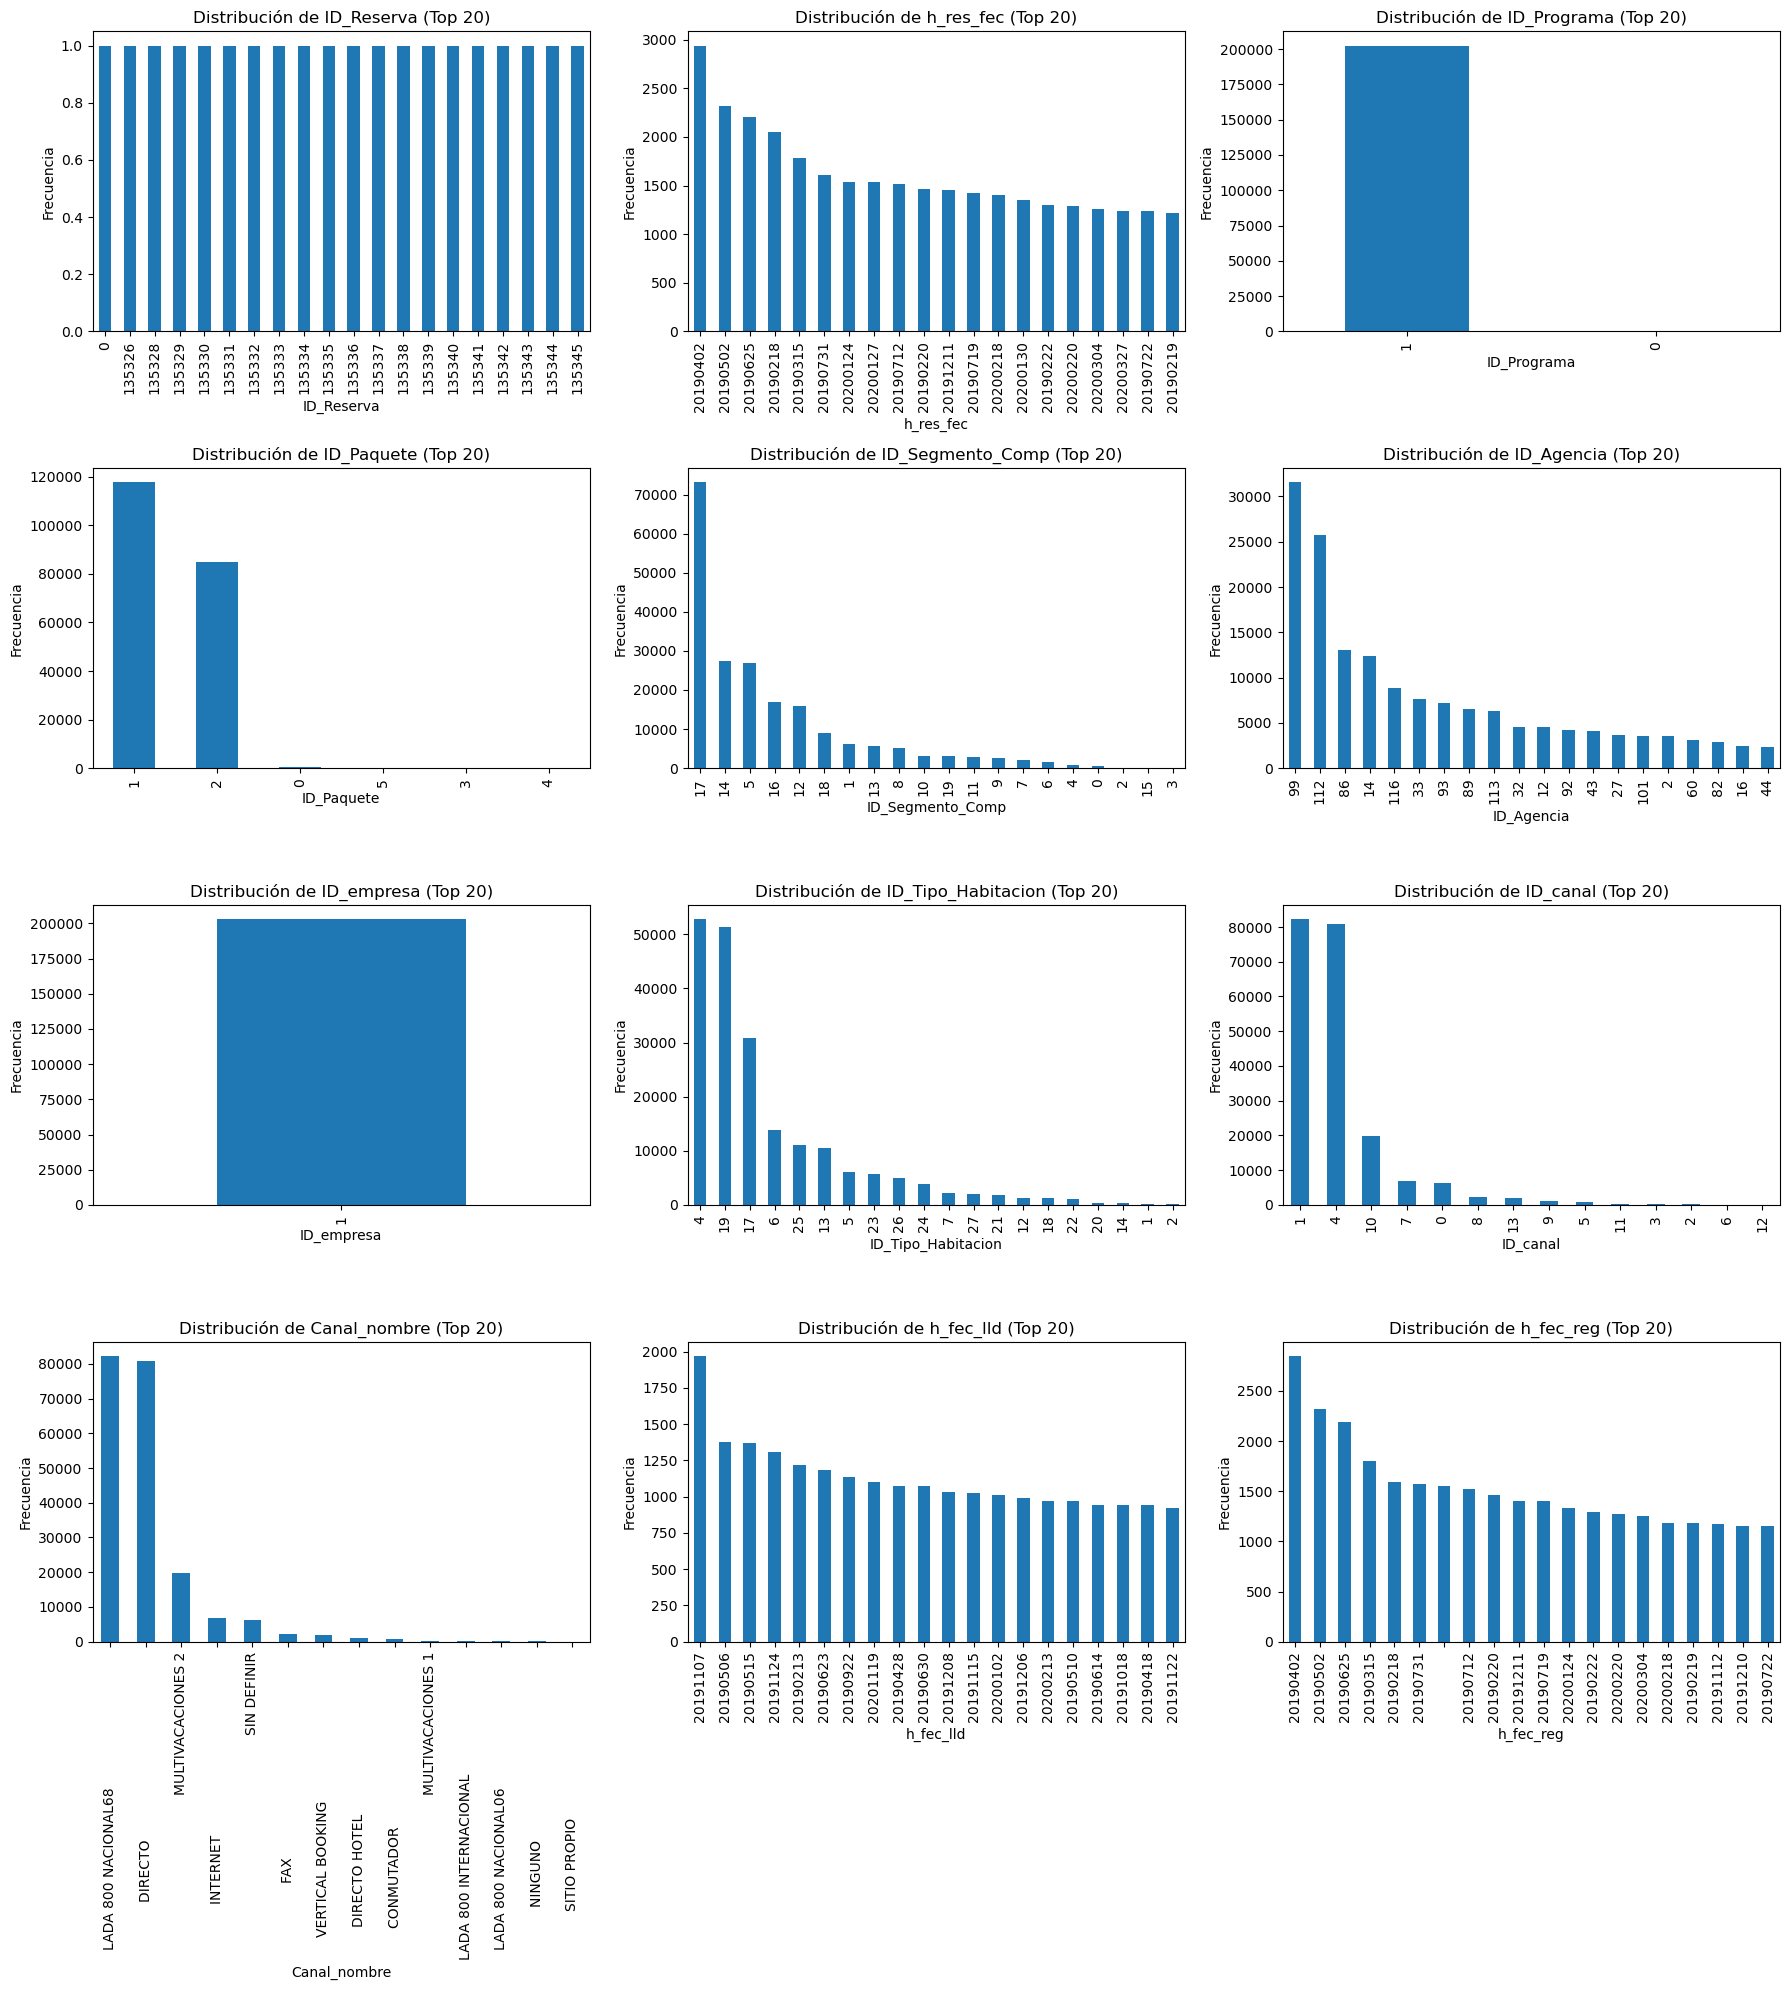

In [10]:
# Selecciona columnas categóricas (tipo object)
cat_cols = reservaciones.select_dtypes(include=['object']).columns

import matplotlib.pyplot as plt

# Número de columnas a graficar (máximo 12 para evitar sobrecargar)
n_cols = min(len(cat_cols), 12)
n_rows = (n_cols + 2) // 3  # 3 columnas por fila

fig, axes = plt.subplots(n_rows, 3, figsize=(18, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(cat_cols[:n_cols]):
    reservaciones[col].value_counts(dropna=False).head(20).plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Distribución de {col} (Top 20)')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

# Elimina ejes vacíos si hay menos de n_rows*3 columnas
for j in range(i + 1, n_rows * 3):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


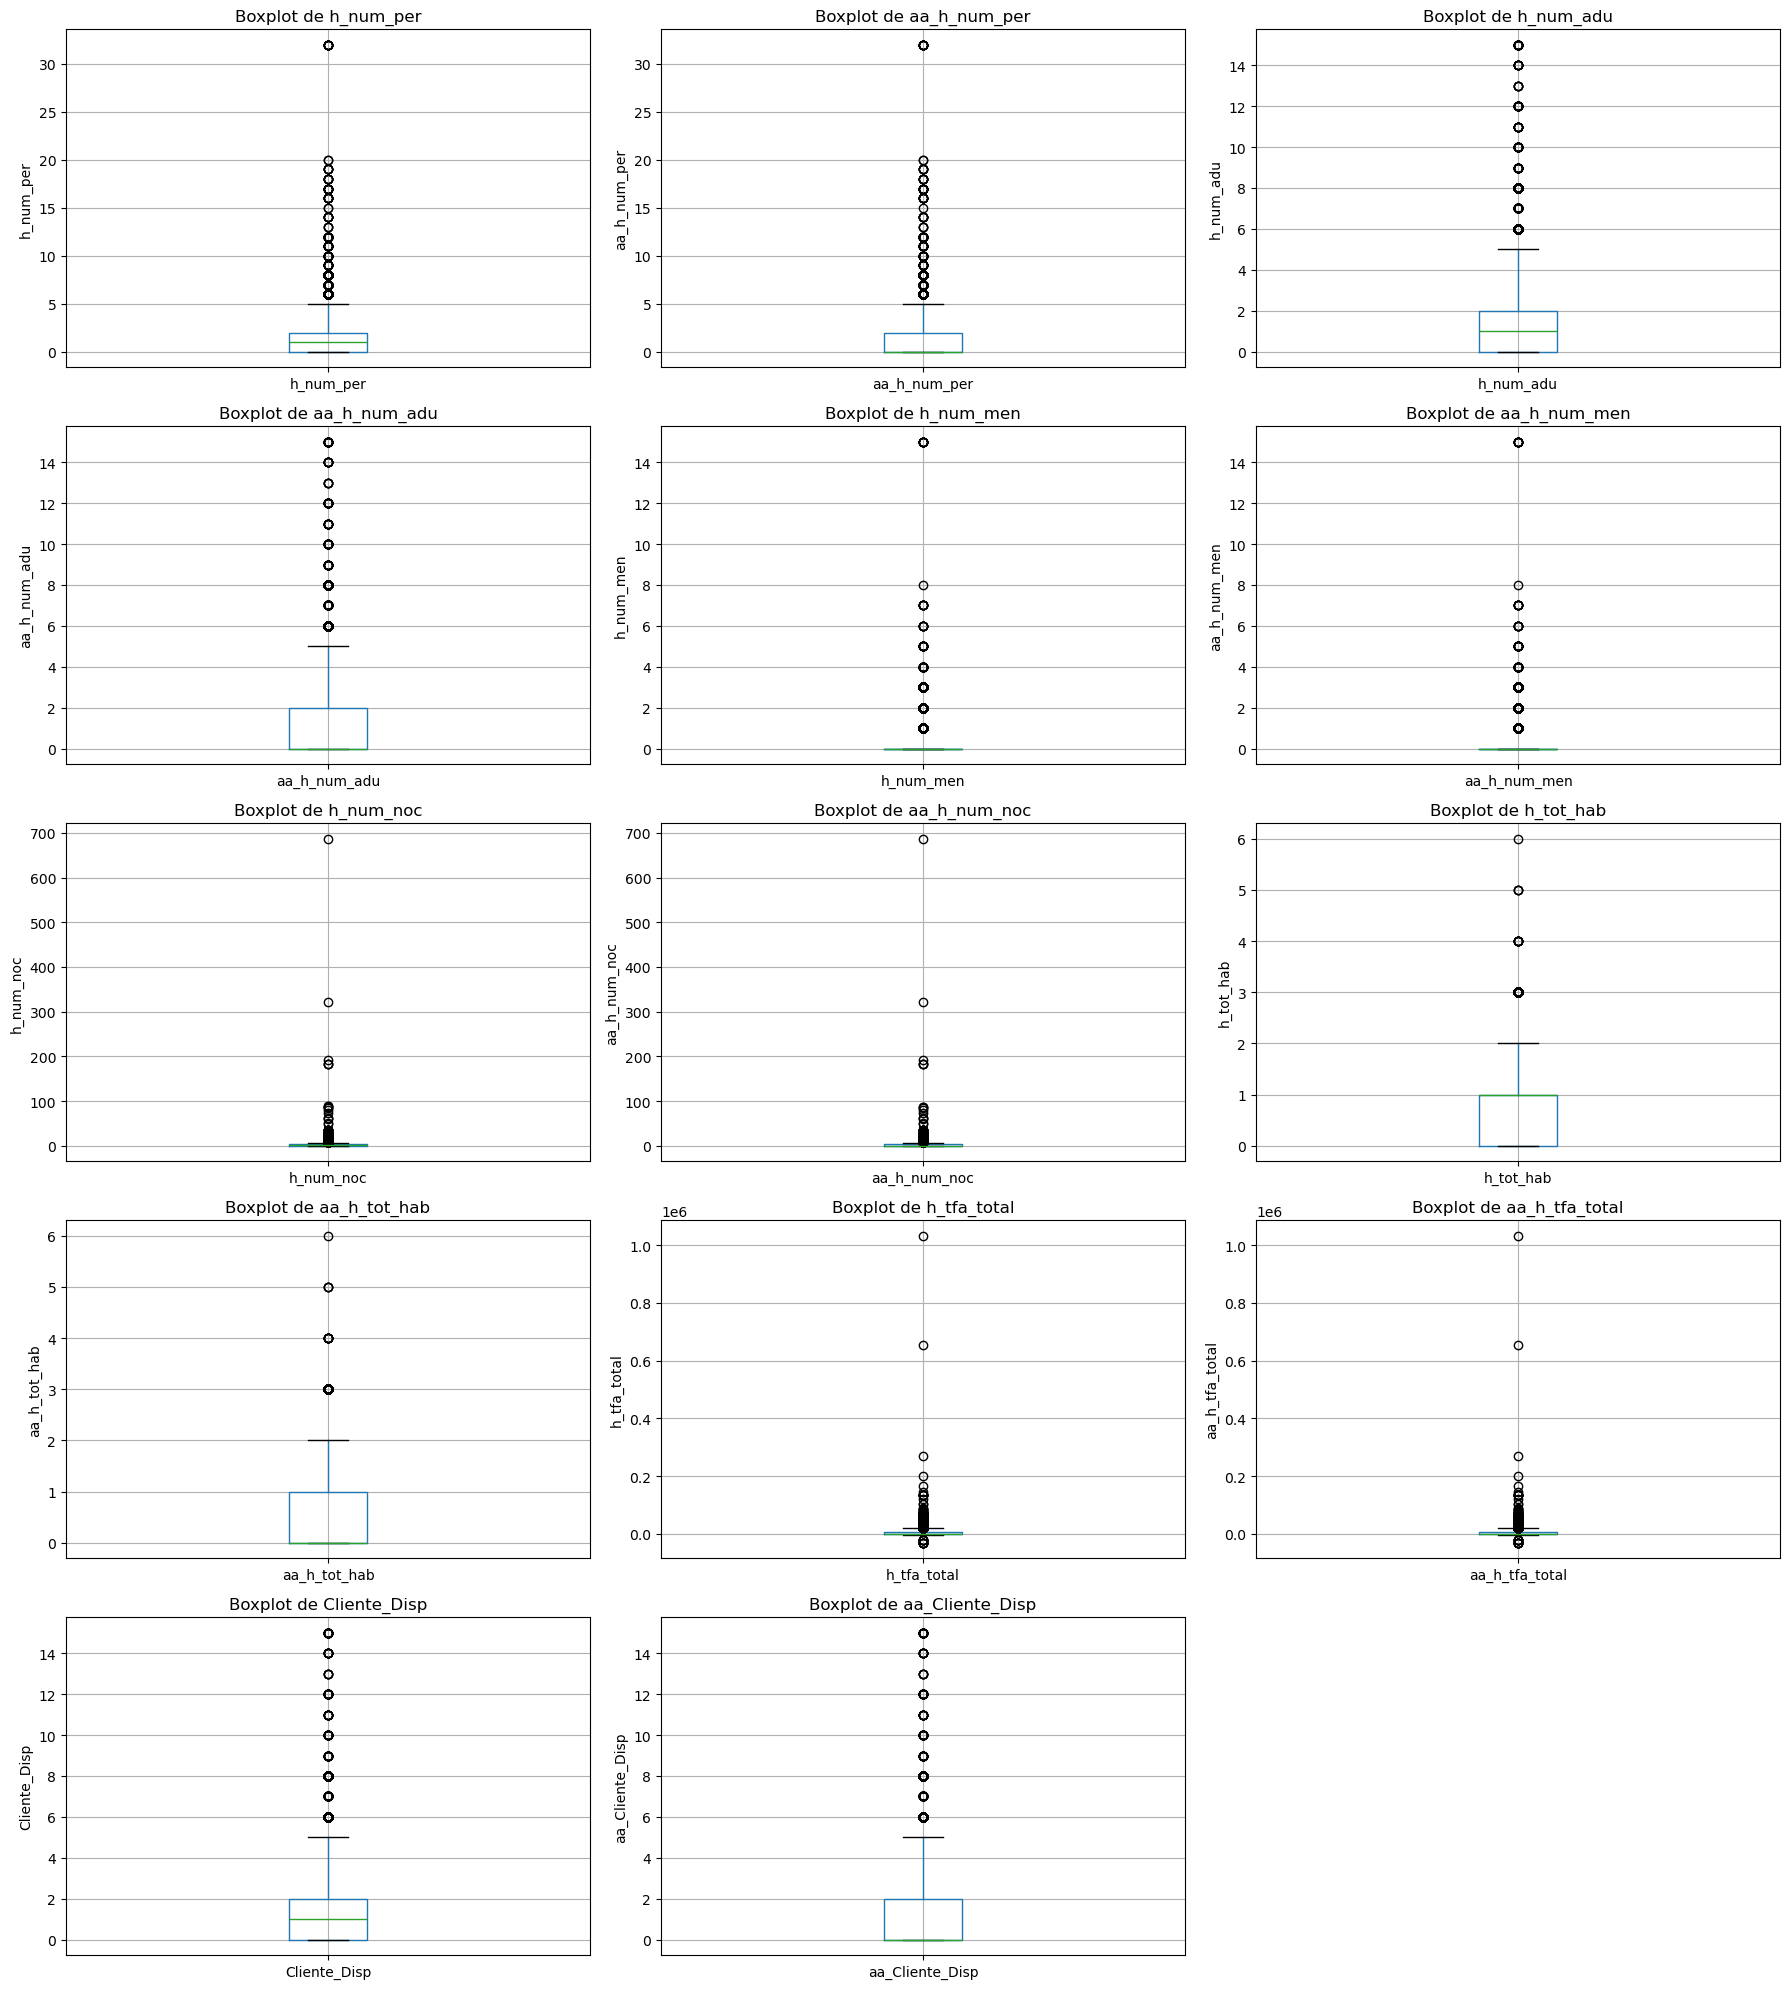

In [11]:
# Boxplots de las variables numéricas en subplots
fig2, axes2 = plt.subplots(nrows=5, ncols=3, figsize=(18, 20))
axes2 = axes2.flatten()

for idx, col in enumerate(numericas):
    reservaciones.boxplot(column=col, ax=axes2[idx])
    axes2[idx].set_title(f'Boxplot de {col}')
    axes2[idx].set_ylabel(col)

# Elimina ejes vacíos si hay menos subplots que espacios
for j in range(len(numericas), len(axes2)):
    fig2.delaxes(axes2[j])

plt.tight_layout()
plt.show()

In [12]:
# Mostrar el rango de fechas (mínimo y máximo) para todas las columnas de tipo datetime
print("Rango de fechas para columnas tipo datetime:")
for fecha_col in fechas:
    if fecha_col in reservaciones.columns:
        min_fecha = reservaciones[fecha_col].min()
        max_fecha = reservaciones[fecha_col].max()
        print(f"{fecha_col}: {min_fecha} a {max_fecha}")

Rango de fechas para columnas tipo datetime:
Fecha_hoy: 2019-01-02 00:00:00 a 2021-04-04 00:00:00
h_fec_reg_ok: 2000-01-01 00:00:00 a 2020-07-13 00:00:00
h_fec_reg_okt: 2000-01-01 00:00:00 a 2020-07-13 00:00:00
h_res_fec_ok: 2019-01-02 00:00:00 a 2020-04-30 00:00:00
h_res_fec_okt: 2019-01-02 00:00:00 a 2020-04-30 00:00:00
h_fec_lld_ok: 2000-01-01 00:00:00 a 2021-12-02 00:00:00
h_fec_lld_okt: 2000-01-01 00:00:00 a 2021-12-02 00:00:00
h_fec_sda_ok: 2000-01-01 00:00:00 a 2021-12-05 00:00:00
h_fec_sda_okt: 2000-01-01 00:00:00 a 2021-12-05 00:00:00
h_ult_cam_fec_ok: 2000-01-01 00:00:00 a 2020-07-13 00:00:00
h_ult_cam_fec_okt: 2000-01-01 00:00:00 a 2020-07-13 00:00:00


#### 1.5 Correlación entre variables numéricas

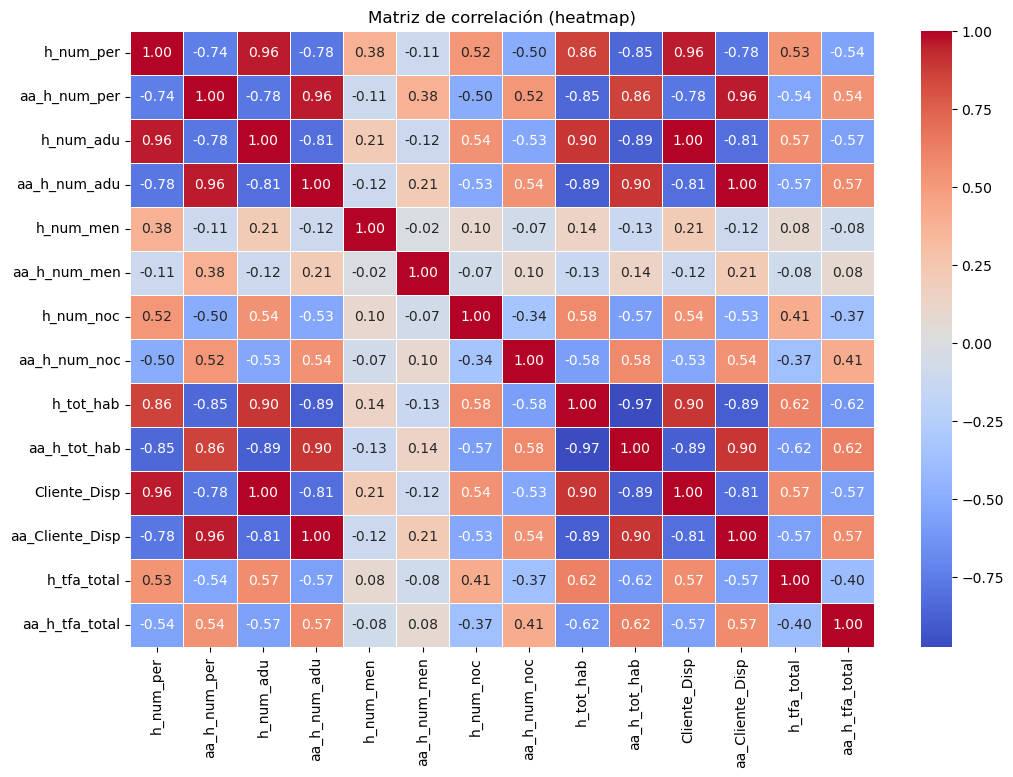

In [13]:
import seaborn as sns

import matplotlib.pyplot as plt

corr = reservaciones.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de correlación (heatmap)")
plt.show()

### 2. Data Wrangling: Transformación y Limpieza de Datos

#### 2.1 Análisis de extracción de datos y metodología de preparación

##### Proceso de extracción de datos desde SQL Server

Para la preparación de este análisis, se llevó a cabo un proceso de extracción de datos desde una base de datos SQL Server. El proceso consistió en las siguientes etapas:

1. **Extracción mediante JOIN**: Se realizó una consulta que unió dos tablas principales:
    - `iar_reservaciones`: Tabla principal con información de reservas hoteleras
    - `iar_canales`: Tabla de referencia con información de los canales de venta/reserva

2. **Campo de unión**: La relación entre ambas tablas se estableció mediante el campo `ID_canal`, que está presente en ambas tablas como llave primaria en `iar_canales` y llave foránea en `iar_reservaciones`.

3. **Consulta SQL utilizada**: Se implementó un LEFT JOIN para asegurar que se preservaran todas las reservaciones, incluso aquellas sin un canal identificado:


##### Análisis de integridad referencial

In [14]:
import seaborn as sns

# Crear un dataframe que muestre la relación entre ID_canal y Canal_nombre
canal_mapping = reservaciones[['ID_canal', 'Canal_nombre']].drop_duplicates().sort_values('ID_canal')

# Verificar la integridad de la relación
consistency_check = reservaciones.groupby('ID_canal')['Canal_nombre'].nunique()
inconsistent_ids = consistency_check[consistency_check > 1]

print("Mapeo de ID_canal a Canal_nombre:")
display(canal_mapping)

if len(inconsistent_ids) > 0:
    print("\nSe encontraron inconsistencias en los siguientes ID_canal (tienen más de un Canal_nombre asociado):")
    for canal_id in inconsistent_ids.index:
        print(f"\nID_canal = {canal_id} tiene {inconsistent_ids[canal_id]} nombres diferentes:")
        unique_names = reservaciones[reservaciones['ID_canal'] == canal_id]['Canal_nombre'].unique()
        for name in unique_names:
            count = reservaciones[(reservaciones['ID_canal'] == canal_id) & 
                                 (reservaciones['Canal_nombre'] == name)].shape[0]
            print(f"   - '{name}': {count} reservaciones")
else:
    print("\nNo se encontraron inconsistencias entre ID_canal y Canal_nombre")

# Contar el número de reservaciones por canal
reservations_per_channel = reservaciones.groupby(['ID_canal', 'Canal_nombre']).size().reset_index(name='count')
reservations_per_channel = reservations_per_channel.sort_values('count', ascending=False)

print("\nNúmero de reservaciones por canal:")
display(reservations_per_channel.head(10))


Mapeo de ID_canal a Canal_nombre:


,ID_canal,Canal_nombre
48,0,SIN DEFINIR
7,1,LADA 800 NACIONAL68 ...
0,10,MULTIVACACIONES 2
7557,11,MULTIVACACIONES 1
5,12,SITIO PROPIO ...
4,13,VERTICAL BOOKING ...
1306,2,LADA 800 NACIONAL06 ...
48583,3,LADA 800 INTERNACIONAL ...
16,4,DIRECTO ...
771,5,CONMUTADOR ...



No se encontraron inconsistencias entre ID_canal y Canal_nombre

Número de reservaciones por canal:


,ID_canal,Canal_nombre,count
1,1,LADA 800 NACIONAL68 ...,82255
8,4,DIRECTO ...,80877
2,10,MULTIVACACIONES 2,19743
11,7,INTERNET ...,6805
0,0,SIN DEFINIR,6378
12,8,FAX ...,2225
5,13,VERTICAL BOOKING ...,1960
13,9,DIRECTO HOTEL ...,1092
9,5,CONMUTADOR ...,896
3,11,MULTIVACACIONES 1,347


In [15]:
problemas_integridad = []

# Se verifica la relación de distintas columnas numéricas que podrían representar relaciones ilógicas
filas_ilogicas = reservaciones[
    (reservaciones['h_num_adu'] + reservaciones['h_num_men'] > reservaciones['h_num_per']) |
    (reservaciones['aa_h_num_adu'] + reservaciones['aa_h_num_men'] > reservaciones['aa_h_num_per'])
]
if len(filas_ilogicas) > 0:
    problemas_integridad.append(f"Se encontraron {len(filas_ilogicas)} renglones donde adultos + menores > total personas")

# Se verifica que el día de llegada sea antes que el día de salida
problemas_fechas = reservaciones[
    pd.to_datetime(reservaciones['h_fec_lld_ok']) >= pd.to_datetime(reservaciones['h_fec_sda_ok'])
]
if len(problemas_fechas) > 0:
    problemas_integridad.append(f"Se encontraron {len(problemas_fechas)} renglones donde el día de llegada es igual o posterior al día de salida")

if problemas_integridad:
    print("\nProblemas de integridad:")
    for problema in problemas_integridad:
        print(f"- {problema}")
else:
    print("\nNo se encontraron problemas de integridad")


Problemas de integridad:
- Se encontraron 113 renglones donde adultos + menores > total personas
- Se encontraron 1074 renglones donde el día de llegada es igual o posterior al día de salida


In [16]:
# Calcula el número total de personas (adultos + menores)
reservaciones['h_num_per']=reservaciones['h_num_adu']+reservaciones['h_num_men']

# Calcula el número de noches restando la fecha de llegada a la de salida
delta = reservaciones['h_fec_sda_ok'] - reservaciones['h_fec_lld_ok']
reservaciones['h_num_noc'] = delta.dt.days

# Crea una máscara para identificar reservaciones con 0 noches
mask_no_nights = reservaciones['h_num_noc'] == 0

# Crea una máscara para conservar las reservaciones con 0 noches pero válidas:
# que tengan estado 9 y al menos una persona
mask_promote = (
        mask_no_nights &
        (reservaciones['ID_estatus_reservaciones'] == 9) &
        (reservaciones['h_num_per'] > 0)
    )

# Asigna 1 noche a estas reservaciones válidas
reservaciones.loc[mask_promote, 'h_num_noc'] = 1

# Elimina las reservaciones con 0 noches que no son válidas
to_drop = mask_no_nights & ~mask_promote
reservaciones = reservaciones.loc[~to_drop].copy()

# Crea una máscara para detectar registros sin personas
mask2 = reservaciones['h_num_per'] == 0

# Si el número de personas es 0, intenta recuperarlo de los campos alternativos
reservaciones.loc[mask2, 'h_num_per'] = (
        reservaciones.loc[mask2, 'aa_h_num_adu']
    + reservaciones.loc[mask2, 'aa_h_num_men']
    )

# Filtra para mantener solo las reservaciones donde la fecha de llegada es anterior o igual a la de salida
reservaciones = reservaciones[reservaciones['h_fec_lld_ok'] <= reservaciones['h_fec_sda_ok']].copy()

#### 2.2 Tipos de Datos

In [17]:
# Tipos de datos de las columnas
print("\nTipos de datos de las columnas:")      
print(reservaciones.dtypes)


Tipos de datos de las columnas:
ID_Reserva                          object
Fecha_hoy                   datetime64[ns]
h_res_fec                           object
h_res_fec_ok                datetime64[ns]
h_res_fec_okt               datetime64[ns]
h_num_per                            int64
aa_h_num_per                         int64
h_num_adu                            int64
aa_h_num_adu                         int64
h_num_men                            int64
aa_h_num_men                         int64
h_num_noc                            int64
aa_h_num_noc                         int64
h_tot_hab                            int64
aa_h_tot_hab                         int64
ID_Programa                         object
ID_Paquete                          object
ID_Segmento_Comp                    object
ID_Agencia                          object
ID_empresa                          object
ID_Tipo_Habitacion                  object
ID_canal                            object
Canal_nombre         

In [18]:
#Verificar si hay valores negativos en columnas numéricas
columnas_numericas = [
    'h_num_per', 'aa_h_num_per', 'h_num_adu', 'aa_h_num_adu',
    'h_num_men', 'aa_h_num_men', 'h_num_noc', 'aa_h_num_noc',
    'h_tot_hab', 'aa_h_tot_hab', 'h_tfa_total', 'aa_h_tfa_total'
]

valores_negativos = {}
for col in columnas_numericas:
    cantidad_negativos = (reservaciones[col] < 0).sum()
    if cantidad_negativos > 0:
        valores_negativos[col] = cantidad_negativos

if valores_negativos:
    print("\nSe encontraron valores negativos en las siguientes columnas:")
    for col, cant in valores_negativos.items():
        print(f"- {col}: {cant} valores negativos")
else:
    print("\nNo se encontraron valores negativos")


Se encontraron valores negativos en las siguientes columnas:
- h_tfa_total: 32 valores negativos
- aa_h_tfa_total: 32 valores negativos


In [19]:
filas_negativas = reservaciones['h_tfa_total'] < 0
reservaciones.loc[filas_negativas, 'h_tfa_total'] = 0

#### 2.3 Corrección de datos faltantes o duplicados

In [20]:
reservaciones.drop(columns=['h_correo_e', 'h_nom'], inplace=True)

# Resumen de la calidad de los datos después de la limpieza
print("\nResumen de calidad de datos después de la limpieza:")
print(f"Total de registros: {len(reservaciones)}")
print(f"Columnas con todos los valores válidos: {(reservaciones.count() == len(reservaciones)).sum()}/{len(reservaciones.columns)}")


Resumen de calidad de datos después de la limpieza:
Total de registros: 201928
Columnas con todos los valores válidos: 48/48


#### 2.4 Análisis Estadístico: Valores imposibles, Outliers, Dist. Normal y Valores Balanceados

In [21]:
import seaborn as sns
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt


# Seleccionar columnas numéricas continuas relevantes
columnas_continuas = [
    'h_num_per', 'aa_h_num_per', 
    'h_num_adu', 'aa_h_num_adu',
    'h_num_men', 'aa_h_num_men', 
    'h_num_noc', 'aa_h_num_noc',
    'h_tfa_total', 'aa_h_tfa_total'
]

# Calcular estadísticas descriptivas
estadisticas_df = pd.DataFrame({
    'media': reservaciones[columnas_continuas].mean(),
    'mediana': reservaciones[columnas_continuas].median(),
    'desviación_std': reservaciones[columnas_continuas].std(),
    'mínimo': reservaciones[columnas_continuas].min(),
    'máximo': reservaciones[columnas_continuas].max(),
    'sesgo': reservaciones[columnas_continuas].skew(),
    'curtosis': reservaciones[columnas_continuas].kurtosis(),
    'porc_nulos': reservaciones[columnas_continuas].isnull().mean() * 100
})

print("Resumen estadístico de las variables continuas:")
display(estadisticas_df)


# Detección de valores atípicos usando el método IQR
outliers = {}
for col in columnas_continuas:
    Q1 = reservaciones[col].quantile(0.25)
    Q3 = reservaciones[col].quantile(0.75)
    IQR = Q3 - Q1
    count = ((reservaciones[col] < (Q1 - 1.5 * IQR)) | 
             (reservaciones[col] > (Q3 + 1.5 * IQR))).sum()
    outliers[col] = count

print("\nConteo de valores atípicos según el método IQR:")
for col, count in outliers.items():
    print(f"- {col}: {count} outliers ({count/len(reservaciones)*100:.2f}% del total)")

# Pruebas de normalidad
pruebas_normalidad = {}
for col in columnas_continuas:
    muestra = reservaciones[col].dropna().sample(min(1000, reservaciones[col].notnull().sum()))
    stat, p = stats.shapiro(muestra)
    pruebas_normalidad[col] = {
        'estadístico': stat,
        'valor_p': p,
        'normal': p > 0.05
    }

print("\nPrueba de normalidad Shapiro-Wilk (muestra de hasta 1000 valores):")
for col, resultado in pruebas_normalidad.items():
    print(f"- {col}: {'Normal' if resultado['normal'] else 'No normal'} (valor p: {resultado['valor_p']:.4f})")



Resumen estadístico de las variables continuas:


,media,mediana,desviación_std,mínimo,máximo,sesgo,curtosis,porc_nulos
h_num_per,2.242106,2.0,0.892521,1.0,30.0,7.314788,138.117195,0.0
aa_h_num_per,1.170442,0.0,1.367739,0.0,32.0,1.809283,17.873593,0.0
h_num_adu,1.094682,1.0,1.206712,0.0,15.0,1.057465,4.368201,0.0
aa_h_num_adu,1.079588,0.0,1.204315,0.0,15.0,1.059643,4.233600,0.0
h_num_men,0.034106,0.0,0.265316,0.0,15.0,16.098015,583.817646,0.0
aa_h_num_men,0.033730,0.0,0.264167,0.0,15.0,16.249542,593.662817,0.0
h_num_noc,3.333579,3.0,2.475877,1.0,321.0,40.156889,3899.726958,0.0
aa_h_num_noc,1.655605,0.0,2.406717,0.0,321.0,22.720344,2236.591159,0.0
h_tfa_total,4104.111401,0.0,6035.741321,0.0,655848.0,8.914675,710.340530,0.0
aa_h_tfa_total,4034.229415,0.0,5977.943890,-30910.0,655848.0,8.997583,736.753454,0.0



Conteo de valores atípicos según el método IQR:
- h_num_per: 48914 outliers (24.22% del total)
- aa_h_num_per: 1223 outliers (0.61% del total)
- h_num_adu: 732 outliers (0.36% del total)
- aa_h_num_adu: 710 outliers (0.35% del total)
- h_num_men: 4565 outliers (2.26% del total)
- aa_h_num_men: 4512 outliers (2.23% del total)
- h_num_noc: 2284 outliers (1.13% del total)
- aa_h_num_noc: 1125 outliers (0.56% del total)
- h_tfa_total: 4370 outliers (2.16% del total)
- aa_h_tfa_total: 4438 outliers (2.20% del total)

Prueba de normalidad Shapiro-Wilk (muestra de hasta 1000 valores):
- h_num_per: No normal (valor p: 0.0000)
- aa_h_num_per: No normal (valor p: 0.0000)
- h_num_adu: No normal (valor p: 0.0000)
- aa_h_num_adu: No normal (valor p: 0.0000)
- h_num_men: No normal (valor p: 0.0000)
- aa_h_num_men: No normal (valor p: 0.0000)
- h_num_noc: No normal (valor p: 0.0000)
- aa_h_num_noc: No normal (valor p: 0.0000)
- h_tfa_total: No normal (valor p: 0.0000)
- aa_h_tfa_total: No normal (va

#### 2.5 Determinación de variables a utilizar para el análisis

In [22]:
reservaciones = reservaciones[['ID_Reserva','h_res_fec_ok','h_fec_lld_ok', 'h_fec_sda_ok','h_num_per','h_num_adu','h_num_men','h_num_noc','h_tot_hab','ID_Tipo_Habitacion','ID_canal','h_tfa_total','ID_Pais_Origen','ID_Paquete','ID_Agencia','ID_estatus_reservaciones']]
reservaciones.head()

,ID_Reserva,h_res_fec_ok,h_fec_lld_ok,h_fec_sda_ok,h_num_per,h_num_adu,h_num_men,h_num_noc,h_tot_hab,ID_Tipo_Habitacion,ID_canal,h_tfa_total,ID_Pais_Origen,ID_Paquete,ID_Agencia,ID_estatus_reservaciones
0,0,2019-08-16,2019-11-07,2019-11-10,2,2,0,3,1,25,10,2659.98,157,1,112,9
1,1,2019-10-22,2019-12-01,2019-12-05,4,4,0,4,1,25,10,1764.00,157,2,112,9
2,2,2019-10-28,2019-12-01,2019-12-05,2,2,0,4,1,23,10,2660.04,157,1,112,9
3,3,2019-10-28,2019-12-08,2019-12-11,3,3,0,3,1,24,10,1995.03,157,2,112,9
4,4,2019-10-28,2019-12-08,2019-12-12,2,2,0,4,1,4,13,13369.92,157,1,14,9


### 3. Profile Report Final

In [23]:
from ydata_profiling import ProfileReport
from ydata_profiling.utils.cache import cache_file

profile_report = ProfileReport(reservaciones, title="Reporte Reservaciones Limpio", minimal=True)
profile_report.to_file("resv_profilereport.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 16/16 [00:01<00:00, 11.85it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### 4. Limpieza de Datos para serie de tiempo

In [24]:
# Crear un DataFrame expandido para las fechas de estancia
expanded_resv = reservaciones.loc[reservaciones['h_num_noc'] > 0].copy()

# Expandir las fechas de estancia por cada noche
expanded_resv = expanded_resv.loc[expanded_resv.index.repeat(expanded_resv['h_num_noc'])]

# Calcular las fechas de estancia día por día
expanded_resv['fecha_estancia'] = expanded_resv.groupby('ID_Reserva').cumcount().apply(pd.Timedelta, unit='D') + expanded_resv['h_fec_lld_ok']

# Agrupar por fecha de estancia y sumar el número de personas
serie_tiempo = expanded_resv.groupby('fecha_estancia')['h_num_per'].sum()

# Eliminar las filas con fechas fuera del rango deseado
serie_tiempo = serie_tiempo[serie_tiempo.index >= '2019-02-13']
serie_tiempo = serie_tiempo[serie_tiempo.index.year < 2021]


# Crear un rango completo de fechas entre el mínimo y máximo de la serie
full_range = pd.date_range(start=serie_tiempo.index.min(), end=serie_tiempo.index.max(), freq='D')
serie_tiempo = serie_tiempo.reindex(full_range)

# Imputación lineal
model_input_table = serie_tiempo.interpolate(method='linear')
model_input_table = model_input_table.to_frame()
model_input_table = model_input_table.reset_index()
model_input_table.rename(columns={'index': 'fecha_estancia'}, inplace=True)

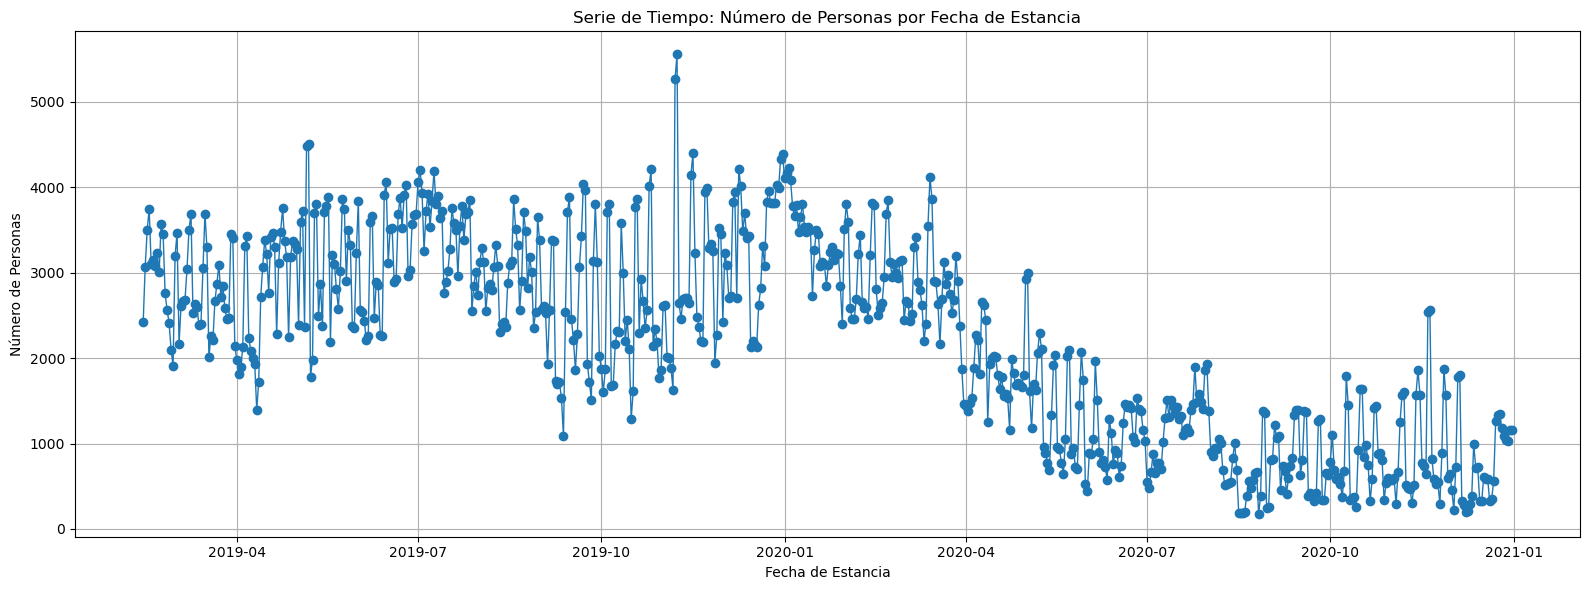

In [25]:
plt.figure(figsize=(16, 6))
plt.plot(model_input_table['fecha_estancia'], model_input_table['h_num_per'], marker='o', linestyle='-', linewidth=1)
plt.title('Serie de Tiempo: Número de Personas por Fecha de Estancia')
plt.xlabel('Fecha de Estancia')
plt.ylabel('Número de Personas')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Serie de tiempo con boost por COVID

In [26]:
# Filtrar reservas válidas
expanded_resv = reservaciones.loc[reservaciones['h_num_noc'] > 0].copy()

# Expandir por noche de estancia
expanded_resv = expanded_resv.loc[expanded_resv.index.repeat(expanded_resv['h_num_noc'])]

# Calcular fecha individual de estancia
expanded_resv['fecha_estancia'] = expanded_resv.groupby('ID_Reserva').cumcount().apply(pd.Timedelta, unit='D') + expanded_resv['h_fec_lld_ok']

# Crear serie temporal sumando número de personas por fecha
serie_tiempo = expanded_resv.groupby('fecha_estancia')['h_num_per'].sum()

# Calcular promedio antes y despues de pandemia para crear un ratio que se aplicará a los datos posteriores
# a marzo 2020 y tener un boost mas natural para que se acerque lo mas posible a un valor real
pre_pandemia = serie_tiempo[(serie_tiempo.index >= '2019-02-13') & (serie_tiempo.index < '2020-04-01')]
post_pandemia = serie_tiempo[(serie_tiempo.index >= '2020-04-01') & (serie_tiempo.index < '2021-01-01')]
ratio = pre_pandemia.mean() - post_pandemia.mean()

# Identificar rango a modificar: desde 2020-03-01 hasta antes de 2021
rango_boost = (serie_tiempo.index >= '2020-04-01') & (serie_tiempo.index < '2021-01-01')
    
# Aplicar boost sumando el promedio
serie_tiempo.loc[rango_boost] = serie_tiempo.loc[rango_boost] + ratio
serie_tiempo = serie_tiempo[(serie_tiempo.index >= '2019-02-13') & (serie_tiempo.index < '2021-01-01')]

# Crear rango de fechas completo
full_range = pd.date_range(start=serie_tiempo.index.min(), end=serie_tiempo.index.max(), freq='D')
serie_tiempo = serie_tiempo.reindex(full_range)

# Interpolación lineal para fechas faltantes
model_input_table_boost = serie_tiempo.interpolate(method='linear').to_frame(name='h_num_per')
model_input_table_boost = model_input_table_boost.reset_index()
model_input_table_boost.rename(columns={'index': 'fecha_estancia'}, inplace=True)


C:\Users\cecyp\AppData\Local\Temp\ipykernel_18092\3338165235.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[3380.19421528 3314.19421528 3410.19421528 3466.19421528 3824.19421528
 4204.19421528 4146.19421528 3750.19421528 4592.19421528 4558.19421528
 4390.19421528 3192.19421528 3864.19421528 3944.19421528 3964.19421528
 3954.19421528 3742.19421528 3580.19421528 3716.19421528 3500.19421528
 3524.19421528 3472.19421528 3100.19421528 3924.19421528 3760.19421528
 3618.19421528 3652.19421528 3624.19421528 3600.19421528 3740.19421528
 4865.19421528 4931.19421528 3549.19421528 3116.19421528 3640.19421528
 3568.19421528 3996.19421528 4234.19421528 4048.19421528 2903.19421528
 2831.19421528 2713.19421528 2632.19421528 3270.19421528 3859.19421528
 3971.19421528 2899.19421528 2876.19421528 2710.19421528 2580.19421528
 2994.19421528 3965.19421528 4035.19421528 2812.19421528 2883.19421528
 2661.19421528 2644.19

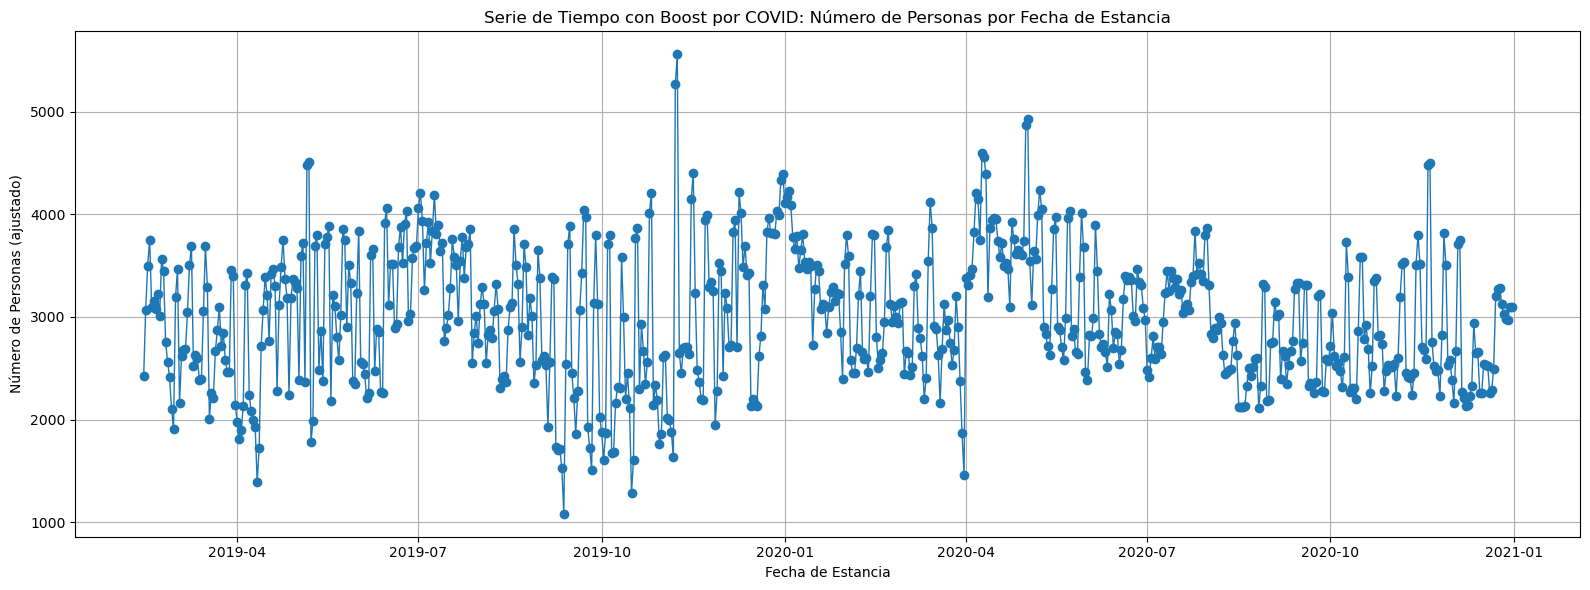

In [27]:
plt.figure(figsize=(16, 6))
plt.plot(model_input_table_boost['fecha_estancia'], model_input_table_boost['h_num_per'], marker='o', linestyle='-', linewidth=1)
plt.title('Serie de Tiempo con Boost por COVID: Número de Personas por Fecha de Estancia')
plt.xlabel('Fecha de Estancia')
plt.ylabel('Número de Personas (ajustado)')
plt.grid(True)
plt.tight_layout()
plt.show()